<a href="https://colab.research.google.com/github/noahkarsky/Spatial_Shrooms/blob/main/Getting_Harris_County_Soil_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets just start this off by saying accessing this data from the website leaves <u>much to be desired. </u> They give shapefiles which is nice, but one needs to have a key for all the units on the map. Then they chuck you like 30 random tables with NO HEADERS and then they ARCHIVED THE TABLE THAT CONTAINS THE HEADER INFORMATION. Literally only by using the waybackmachine was I able to manually copy the information.

In [1]:
! wget https://websoilsurvey.sc.egov.usda.gov/DSD/Download/Cache/SSA/wss_SSA_TX201_soildb_US_2003_[2020-06-11].zip
! unzip wss_SSA_TX201_soildb_US_2003_[2020-06-11].zip

--2021-07-02 01:46:55--  https://websoilsurvey.sc.egov.usda.gov/DSD/Download/Cache/SSA/wss_SSA_TX201_soildb_US_2003_[2020-06-11].zip
Resolving websoilsurvey.sc.egov.usda.gov (websoilsurvey.sc.egov.usda.gov)... 199.134.75.240
Connecting to websoilsurvey.sc.egov.usda.gov (websoilsurvey.sc.egov.usda.gov)|199.134.75.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19369912 (18M) [application/.zip]
Saving to: ‘wss_SSA_TX201_soildb_US_2003_[2020-06-11].zip’

wss_SSA_TX201_soild 100%[===================>]  18.47M  1.48MB/s    in 13s     

2021-07-02 01:47:08 (1.45 MB/s) - ‘wss_SSA_TX201_soildb_US_2003_[2020-06-11].zip’ saved [19369912/19369912]

Archive:  wss_SSA_TX201_soildb_US_2003_[2020-06-11].zip
  inflating: TX201/readme.txt        
  inflating: TX201/soildb_US_2003.mdb  
  inflating: TX201/soil_metadata_tx201.txt  
  inflating: TX201/soil_metadata_tx201.xml  
  inflating: TX201/spatial/soilmu_a_tx201.dbf  
  inflating: TX201/spatial/soilmu_a_tx201.prj  
  in

For the downloaded spatial information these are what the different shapefiles represent

File Name Prefix Spatial Entity  
soilsa_a:soil survey area boundary polygon(s)  
soilmu_a:map unit boundary polygons  
soilmu_l:line map units  
soilmu_p:point map units  
soilsf_l:line spot features  
soilsf_p:point spot features  
soilsf_t:spot feature descriptions 

In [2]:
pip install geopandas

     |████████████████████████████████| 1.0MB 6.5MB/s 
     |████████████████████████████████| 6.6MB 15.2MB/s 
     |████████████████████████████████| 15.4MB 189kB/s 


In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
soils = gpd.read_file('/content/TX201/spatial/soilmu_a_tx201.shp')

In [6]:
soils.head()

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry
0,TX201,5,KanA,2760820,"POLYGON ((-95.10377 29.89458, -95.10382 29.894..."
1,TX201,5,KanA,2760820,"POLYGON ((-95.12539 29.92205, -95.12553 29.922..."
2,TX201,5,KanA,2760820,"POLYGON ((-95.20581 29.79845, -95.20568 29.798..."
3,TX201,5,KanA,2760820,"POLYGON ((-95.20500 29.79066, -95.20516 29.790..."
4,TX201,5,KanA,2760820,"POLYGON ((-95.20643 29.79205, -95.20630 29.791..."


In [7]:
df = pd.read_csv('/content/TX201/tabular/mapunit.txt',sep='|')
df.columns = ['Mapunit_Symbol', 'Mapunit_Name', 'Kind', 'Status', 'Total_Acres',
       'Low', 'RV', 'High', 'Low', 'RV', 'High', 'Farm_Class', 'HEL',
       'HEL_Water', 'HEL_Wind', 'Interpretive_Focus',
       'Order_of_Mapping_Choice', 'IA_CSR', 'NH_Forest_Soil_Grp',
       'NH_SPI_Agr', 'VT_Septic_System', 'Map_Unit_Certification_Status',
       'Legend_Key', 'MUKEY']

df = df[['Mapunit_Symbol', 'Mapunit_Name', 'Kind','Total_Acres','Farm_Class','Interpretive_Focus','Legend_Key','MUKEY']]
df.MUKEY = df.MUKEY.astype(str)

In [8]:
sdf = pd.merge(soils,df,on='MUKEY')

In [31]:
sdf.head()

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry,Mapunit_Symbol,Mapunit_Name,Kind,Total_Acres,Farm_Class,Interpretive_Focus,Legend_Key
0,TX201,5,KanA,2760820,"POLYGON ((-95.10377 29.89458, -95.10382 29.894...",KanA,"Kaman clay, 0 to 1 percent slopes, frequently ...",Consociation,3007,Not prime farmland,pastureland,13287
1,TX201,5,KanA,2760820,"POLYGON ((-95.12539 29.92205, -95.12553 29.922...",KanA,"Kaman clay, 0 to 1 percent slopes, frequently ...",Consociation,3007,Not prime farmland,pastureland,13287
2,TX201,5,KanA,2760820,"POLYGON ((-95.20581 29.79845, -95.20568 29.798...",KanA,"Kaman clay, 0 to 1 percent slopes, frequently ...",Consociation,3007,Not prime farmland,pastureland,13287
3,TX201,5,KanA,2760820,"POLYGON ((-95.20500 29.79066, -95.20516 29.790...",KanA,"Kaman clay, 0 to 1 percent slopes, frequently ...",Consociation,3007,Not prime farmland,pastureland,13287
4,TX201,5,KanA,2760820,"POLYGON ((-95.20643 29.79205, -95.20630 29.791...",KanA,"Kaman clay, 0 to 1 percent slopes, frequently ...",Consociation,3007,Not prime farmland,pastureland,13287


In [36]:
sdf.Kind.value_counts()

Consociation              2347
Complex                   1260
Undifferentiated group      10
Name: Kind, dtype: int64

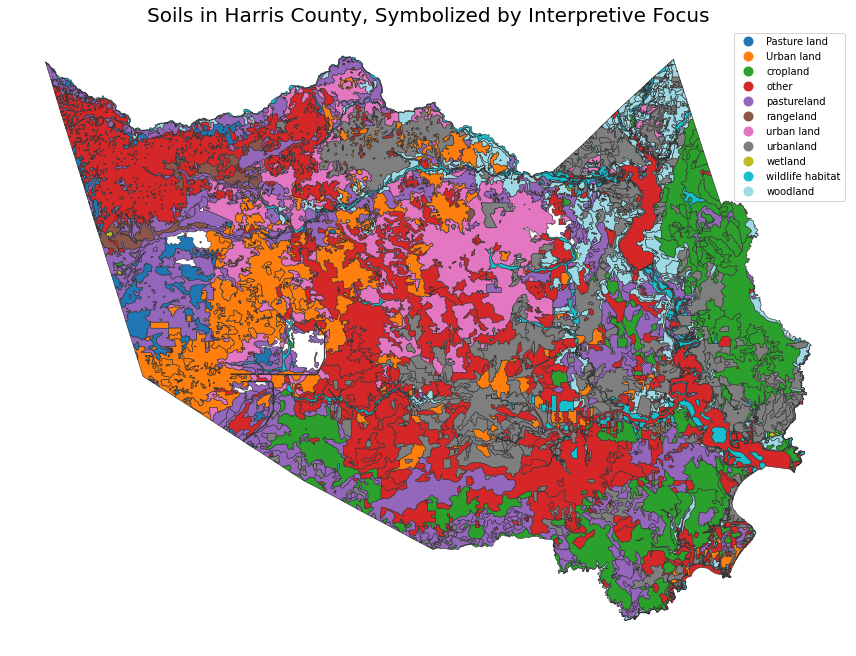

In [52]:
fig, ax = plt.subplots(figsize = (12,12))
sdf.fillna('other').plot(ax=ax, column = 'Interpretive_Focus',linewidth=.6,edgecolor='0.2',categorical=True, cmap='tab20',legend = True,)
ax.axis('off')
ax.set_title('Soils in Harris County, Symbolized by Interpretive Focus',fontsize=20)
plt.tight_layout()

I will probably either split the study up by using a bunch of hex bins over this area or focus on each interprative area. I dont know yet

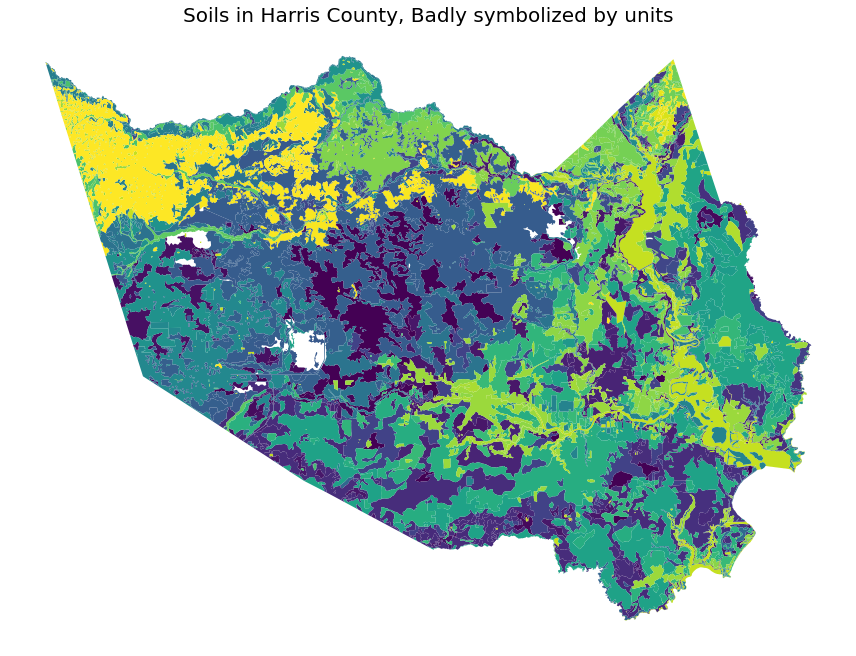

In [43]:
fig, ax = plt.subplots(figsize = (12,12))
sdf.plot(ax=ax, column = 'Mapunit_Symbol',categorical=True, cmap='viridis',legend = False,)
ax.axis('off')
ax.set_title('Soils in Harris County, Badly symbolized by units',fontsize=20)
plt.tight_layout()

In [53]:
# This is the area that the shapefiles cover. This will be helpful when we intergrate satellite data later
aoi = gpd.read_file('/content/TX201/spatial/soilsa_a_tx201.shp')

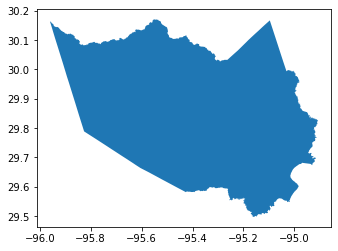

In [13]:
aoi.plot()